# Лабораторная работа №3. Решение СЛАУ. Привалов БПМ-21-3

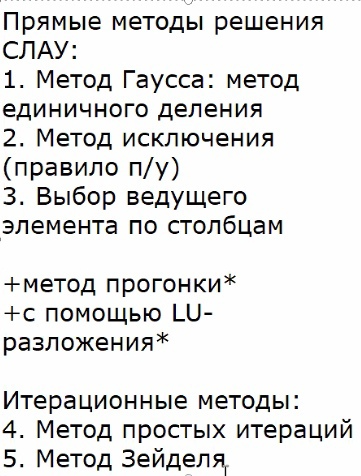

In [38]:
import numpy as np
from numpy.linalg import norm, inv

## 1. Метод единичного деления Гаусса

In [39]:
def gaussian_elimination(a, b):
    n = len(b)
    x = np.zeros(n)

    for k in range(n-1):
        for i in range(k+1, n):
            coef = a[i][k] / a[k][k]
            for j in range(k, n):
                a[i][j] -= coef * a[k][j]
            b[i] -= coef * b[k]

    x[n-1] = b[n-1] / a[n-1][n-1]
    for i in range(n-2, -1, -1):
        sum_ax = 0
        for j in range(i+1, n):
            sum_ax += a[i][j] * x[j]
        x[i] = (b[i] - sum_ax) / a[i][i]
    
    return x

a = np.array([[2, 3, -1], [1, -2, 1], [1, 0, 2]])
b = np.array([9, 3, 2]) 

# Верный ответ: x1 = 4, x2 = 0, x3 = -1

solution = gaussian_elimination(a, b)
print("Решение:", solution)

Решение: [ 4. -0. -1.]


## 2. Метод прямоугольников

In [40]:
def rectangle(A, b):
    n = len(b)
    wide_matrix = np.hstack((A, b.reshape(n, 1)))

    for k in range(0, n):
        max_elem = np.argmax(np.abs(wide_matrix[k:, k])) + k
        wide_matrix[[k, max_elem]] = wide_matrix[[max_elem, k]]

        for i in range(k+1, n):
            coef = wide_matrix[i, k] / wide_matrix[k, k]
            wide_matrix[i, k:] -= coef * wide_matrix[k, k:]

    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (wide_matrix[i, -1] - wide_matrix[i, i+1:n] @ x[i+1:]) / wide_matrix[i, i]

    return x

a = np.array([[2, 3, -1], [1, -2, 1], [1, 0, 2]], dtype=float)
b = np.array([9, 3, 2], dtype=float)

# Верный ответ: x1 = 4, x2 = 0, x3 = -1

solution = rectangle(a, b)
print("Решение:", solution)

Решение: [ 4. -0. -1.]


## 3. Выбор ведущего элемента по столбцам

In [41]:
def vedushiy_element(A, b):
    n = len(b)
    wide_matrix = np.hstack((A, b.reshape(n, 1)))

    for i in range(n):
        max_elem = np.argmax(np.abs(wide_matrix[i:, i])) + i
        wide_matrix[[i, max_elem]] = wide_matrix[[max_elem, i]]

        diagonal_element = wide_matrix[i, i]
        wide_matrix[i, :] /= diagonal_element

        for j in range(i + 1, n):
            coef = wide_matrix[j, i]
            wide_matrix[j, i:] -= coef * wide_matrix[i, i:]

    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = wide_matrix[i, -1] - np.dot(wide_matrix[i, i+1:n], x[i+1:])

    return x

a = np.array([[2, 3, -1], [1, -2, 1], [1, 0, 2]], dtype=float)
b = np.array([9, 3, 2], dtype=float)
# Верный ответ: x1 = 4, x2 = 0, x3 = -1
solution = vedushiy_element(a, b)
print("Решение:", solution)

Решение: [ 4.  0. -1.]


## 4. Метод простых итераций

In [42]:
def simple_iterations_method(A, b, epsilon=0.001):

    n = len(b)
    x_prev = np.zeros(n) 

    while True:
        x_current = np.copy(x_prev)
        for i in range(n):

            sum1 = np.dot(A[i, :i], x_current[:i])
            sum2 = np.dot(A[i, i+1:], x_prev[i+1:])
            x_current[i] = (b[i] - sum1 - sum2) / A[i, i]

        if norm(x_current - x_prev, ord=1) < epsilon:
            break

        x_prev = x_current

    return x_current

# a = np.array([[2, 3, -1], [1, -2, 1], [1, 0, 2]], dtype=float)
# b = np.array([9, 3, 2], dtype=float)

# solution = simple_iterations_method(a, b, epsilon=0.001)
# print("Решение:", solution)

#Для такой матрицы метод итераций работать не будет, так как нужно, чтобы диагональные элементы были больше остальных

a = np.array([[20, 3, -1], [1, 30, 1], [1, 10, 2]], dtype=float)
b = np.array([9, 3, 2], dtype=float)

solution = simple_iterations_method(a, b, epsilon=0.001)
print("Решение:", solution)
print("Проверка:", np.linalg.solve(a,b))


Решение: [0.46016154 0.07080271 0.41590568]
Проверка: [0.46017699 0.07079646 0.4159292 ]


## 5. Метод Зейделя

In [43]:
def Zeidel(A, b, epsilon=0.001, max_iterations=1000):
    n = A.shape[0]
    x = np.zeros(n) 

    L = np.tril(A, k=-1)
    U = np.triu(A, k=1)

    for k in range(max_iterations):
        x_new = np.copy(x)
        for i in range(n):

            sum1 = np.dot(L[i, :], x_new)
            sum2 = np.dot(U[i, :], x)
            x_new[i] = (b[i] - sum1 - sum2) / A[i, i]
        if norm(x_new - x, ord=1) < epsilon:
            return x_new

        x = x_new

    return x

a = np.array([[20, 3, -1], [1, 30, 1], [1, 10, 2]], dtype=float)
b = np.array([9, 3, 2], dtype=float)

solution = Zeidel(a, b, epsilon=0.001)
print("Решение:", solution)
print("Проверка:", np.linalg.solve(a, b))

Решение: [0.46016154 0.07080271 0.41590568]
Проверка: [0.46017699 0.07079646 0.4159292 ]
